https://platform.openai.com/docs/guides/image-generation?image-generation-model=gpt-image-1

In [26]:
import IPython
import sys

def clean_notebook():
    IPython.display.clear_output(wait=True)
    print("Notebook cleaned.")

!pip install openai
!pip install --upgrade openai
!pip install gradio

# Clean up the notebook
clean_notebook()

Notebook cleaned.


In [2]:
import os
from openai import OpenAI
from dotenv import load_dotenv

# Load environment variables
load_dotenv()

True

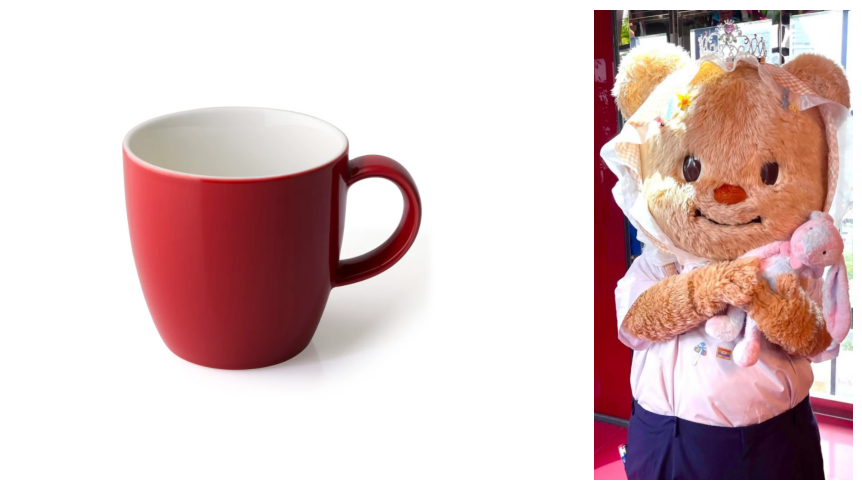

In [34]:
import matplotlib.pyplot as plt
from PIL import Image

# List of image paths
image_paths = ["./cup01.png", "./butter_bear01.png"]

# Create subplots: 1 row, 2 columns
fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # You can adjust figsize as needed

# Loop over image paths and axes
for ax, path in zip(axes, image_paths):
    image = Image.open(path)
    ax.imshow(image)
    ax.axis('off')  # Hide axis

# Display the images
plt.tight_layout()
plt.show()


# First picture

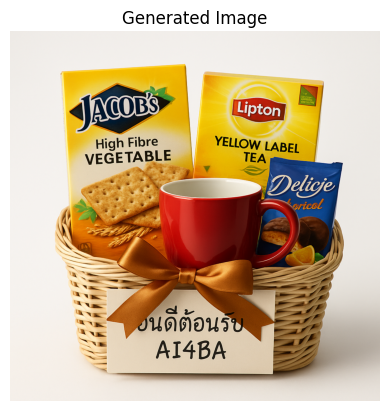

In [32]:
import os
from openai import OpenAI

import base64
from io import BytesIO
import matplotlib.pyplot as plt
from PIL import Image


# Initialize OpenAI client with API key
client = OpenAI(api_key=os.getenv("OPENAI_API_KEY"))

prompt = """
Generate a photorealistic image of a gift basket on a white background 
labeled 'ยินดีต้อนรับ AI4BA' with a ribbon and handwriting-like font, 
containing all the items in the reference pictures.
"""

# Open the reference image (not in a list)
with open("./cup01.png", "rb") as image_file:
    result = client.images.edit(
        model="gpt-image-1",
        image=image_file,  # Single file-like object
        prompt=prompt
    )

# Decode and save the result
image_base64 = result.data[0].b64_json
image_bytes = base64.b64decode(image_base64)


image = Image.open(BytesIO(image_bytes))

# Display the image using matplotlib
plt.imshow(image)
plt.axis('off')  # Hide axes
plt.title("Generated Image")
plt.show()



# Second picture

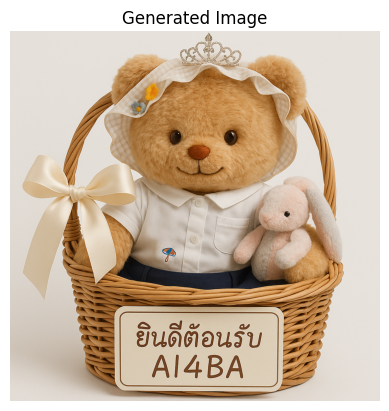

In [33]:
import os
from openai import OpenAI

import base64
from io import BytesIO
import matplotlib.pyplot as plt
from PIL import Image


# Initialize OpenAI client with API key
client = OpenAI(api_key=os.getenv("OPENAI_API_KEY"))

prompt = """
Generate a photorealistic image of a gift basket on a white background 
labeled 'ยินดีต้อนรับ AI4BA' with a ribbon and handwriting-like font, 
containing all the items in the reference pictures.
"""

# Open the reference image (not in a list)
with open("./butter_bear01.png", "rb") as image_file:
    result = client.images.edit(
        model="gpt-image-1",
        image=image_file,  # Single file-like object
        prompt=prompt
    )

# Decode and save the result
image_base64 = result.data[0].b64_json
image_bytes = base64.b64decode(image_base64)


image = Image.open(BytesIO(image_bytes))

# Display the image using matplotlib
plt.imshow(image)
plt.axis('off')  # Hide axes
plt.title("Generated Image")
plt.show()



# Image Edit on Mark image

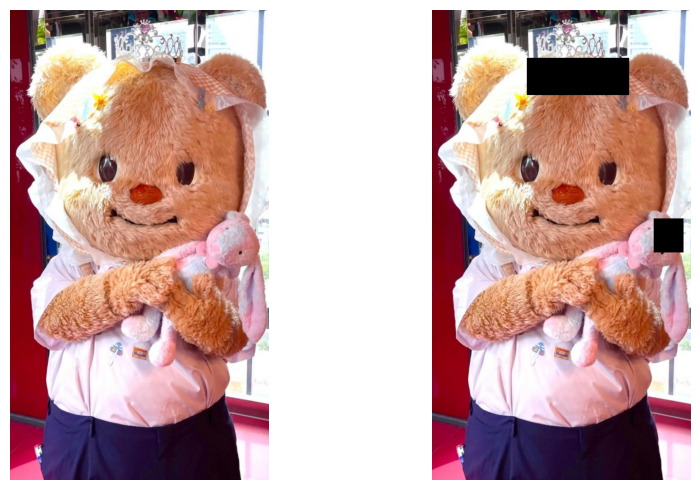

In [43]:
import matplotlib.pyplot as plt
from PIL import Image

# List of image paths
image_paths = [ "./butter_bear01.png","./mark_butter_bear01.png"]

# Create subplots: 1 row, 2 columns
fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # You can adjust figsize as needed

# Loop over image paths and axes
for ax, path in zip(axes, image_paths):
    image = Image.open(path)
    ax.imshow(image)
    ax.axis('off')  # Hide axis

# Display the images
plt.tight_layout()
plt.show()

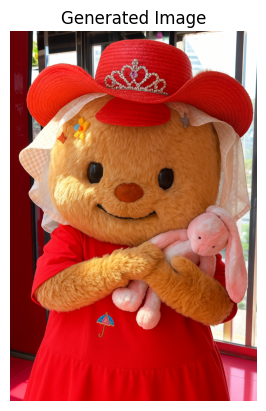

In [1]:
import os
import base64
from io import BytesIO
import matplotlib.pyplot as plt
from PIL import Image
from openai import OpenAI

# Initialize OpenAI client with API key
client = OpenAI(api_key=os.getenv("OPENAI_API_KEY"))

prompt = """
add hat in mark area.
change the color of the dress to red.
"""

# Open the reference image and the mask image
with open("./butter_bear01.png", "rb") as image_file, \
     open("./mark_butter_bear01.png", "rb") as mask_image_file:

    result = client.images.edit(
        model="gpt-image-1",
        image=image_file,     # Original image
        mask=mask_image_file, # Mask image
        prompt=prompt
    )

# Decode the returned image
image_base64 = result.data[0].b64_json
image_bytes = base64.b64decode(image_base64)

# Load and display the image
image = Image.open(BytesIO(image_bytes))
plt.imshow(image)
plt.axis('off')  # Hide axes
plt.title("Generated Image")
plt.show()
